# Taxi Dataset Exploratory Analysis

# Introduction
This project is based on the data analysis and visualization of the taxi trip. Using the various attributes of the dataset we have plotted graph n the basis of which some insights can be found and used to make the services better. 

### Importing required libraries

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime
import calendar
from folium import FeatureGroup, LayerControl, Map, Marker
from folium.plugins import HeatMap
import matplotlib.dates as mdates
import matplotlib as mpl
from datetime import timedelta
import datetime as dt
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
plt.style.use('fivethirtyeight')
import folium
from sklearn.cluster import KMeans
import math
from math import radians
from math import sin, cos, sqrt, atan2, radians

### Reading the data

We have used 2016 NYC Yellow Cab trip record data. Shape of the dataset was 1458644 rows and 11 columns. The dataset consists of following attributes:


In [192]:
train = pd.read_csv("train.csv")
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [193]:
# shape of data
train.shape

(1458644, 11)

In [194]:
# missing/null values in dataset
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### Converting pickup and dropoff datetime column into week/day/ hour format.

In [195]:
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime, format='%Y-%m-%d %H:%M:%S')
train['pickup_date'] = train['pickup_datetime'].dt.strftime('%Y-%m-%d')

train['pickup_day'] = train['pickup_datetime'].apply(lambda x : x.day)
train['pickup_hour'] = train['pickup_datetime'].apply(lambda x : x.hour)
train['pickup_day_of_week'] = train['pickup_datetime'].apply(lambda x : calendar.day_name[x.weekday()])
train['dropoff_datetime'] = pd.to_datetime(train.dropoff_datetime, format='%Y-%m-%d %H:%M:%S')
train['dropoff_date'] = train['dropoff_datetime'].dt.strftime('%Y-%m-%d')
train['dropoff_day'] = train['dropoff_datetime'].apply(lambda x : x.day)
train['dropoff_hour'] = train['dropoff_datetime'].apply(lambda x : x.hour)
train['dropoff_day_of_week'] = train['dropoff_datetime'].apply(lambda x : calendar.day_name[x.weekday()])

In [196]:
train[['pickup_datetime','dropoff_datetime']][:10]

,pickup_datetime,dropoff_datetime
0,2016-03-14 17:24:55,2016-03-14 17:32:30
1,2016-06-12 00:43:35,2016-06-12 00:54:38
2,2016-01-19 11:35:24,2016-01-19 12:10:48
3,2016-04-06 19:32:31,2016-04-06 19:39:40
4,2016-03-26 13:30:55,2016-03-26 13:38:10
5,2016-01-30 22:01:40,2016-01-30 22:09:03
6,2016-06-17 22:34:59,2016-06-17 22:40:40
7,2016-05-21 07:54:58,2016-05-21 08:20:49
8,2016-05-27 23:12:23,2016-05-27 23:16:38
9,2016-03-10 21:45:01,2016-03-10 22:05:26


# Data Visualisation
To Visualize the dataset, we used matplotlib and seaborn library and used the following plots:
• Bar chart 
• Density plot
• Heat Maps 
• Line chart 
• Scatter plot


### Month with higest count of trip

Text(0, 0.5, 'Numbers of Journey')

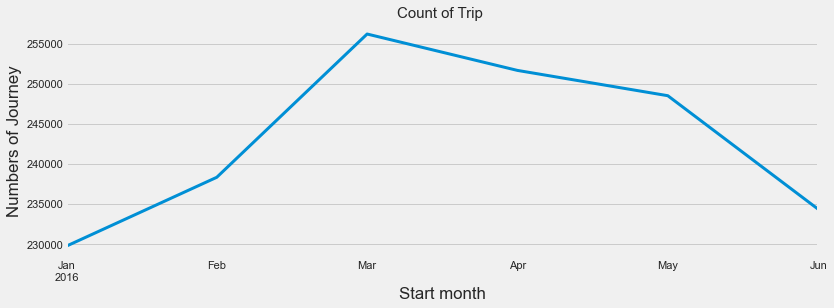

In [197]:
train['start_month_year'] = pd.DatetimeIndex(train['pickup_datetime']).to_period('M')
train['end_month_year'] = pd.DatetimeIndex(train['dropoff_datetime']).to_period('M')

train.groupby(['start_month_year'])['id'].count().plot(figsize = (12,4), linewidth=3)
plt.title('Count of Trip ', fontsize=15)
plt.xlabel('Start Month')
plt.ylabel('Numbers of Journey')

In [198]:
# round the latitude and longitude value to 3 decimals
train['pickup_latitude_round'] = train['pickup_latitude'].apply(lambda x : round(x, 3))
train['pickup_longitude_round'] = train['pickup_longitude'].apply(lambda x : round(x, 3))

train['dropoff_latitude_round'] = train['dropoff_latitude'].apply(lambda x : round(x, 3))
train['dropoff_longitude_round'] = train['pickup_longitude'].apply(lambda x : round(x, 3))

In [199]:
# this functions calculates the distance for each row in km
def calculateDistance(row):
    R = 6373.0
    pickup_lat = radians(row['pickup_latitude'])
    pickup_lon = radians(row['pickup_longitude'])
    
    dropoff_lat = radians(row['dropoff_latitude'])
    dropoff_lon = radians(row['dropoff_longitude'])
    
    d_lon = dropoff_lon - pickup_lon
    d_lat = dropoff_lat - pickup_lat
    
    a = sin(d_lat / 2)** 2 + cos(pickup_lat) * cos(dropoff_lat) * sin(d_lon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

In [200]:
train['trip_distance'] = train.apply(lambda row : calculateDistance(row), axis =1)
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,dropoff_hour,dropoff_day_of_week,start_month_year,end_month_year,pickup_latitude_round,pickup_longitude_round,dropoff_latitude_round,dropoff_longitude_round,trip_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,14,17,Monday,2016-03,2016-03,40.768,-73.982,40.766,-73.982,1.498991
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,12,0,Sunday,2016-06,2016-06,40.739,-73.980,40.731,-73.980,1.806074
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,19,12,Tuesday,2016-01,2016-01,40.764,-73.979,40.710,-73.979,6.387103
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,6,19,Wednesday,2016-04,2016-04,40.720,-74.010,40.707,-74.010,1.485965
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,26,13,Saturday,2016-03,2016-03,40.793,-73.973,40.783,-73.973,1.188962


In [201]:
train['trip_duration_in_hour'] = train['trip_duration'].apply(lambda x : x/3600)
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_hour,dropoff_day_of_week,start_month_year,end_month_year,pickup_latitude_round,pickup_longitude_round,dropoff_latitude_round,dropoff_longitude_round,trip_distance,trip_duration_in_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,17,Monday,2016-03,2016-03,40.768,-73.982,40.766,-73.982,1.498991,0.126389
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0,Sunday,2016-06,2016-06,40.739,-73.980,40.731,-73.980,1.806074,0.184167
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,12,Tuesday,2016-01,2016-01,40.764,-73.979,40.710,-73.979,6.387103,0.590000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,19,Wednesday,2016-04,2016-04,40.720,-74.010,40.707,-74.010,1.485965,0.119167
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,13,Saturday,2016-03,2016-03,40.793,-73.973,40.783,-73.973,1.188962,0.120833


### Plot for trip duration

Text(0.5, 1.0, 'Distribution of trip duration')

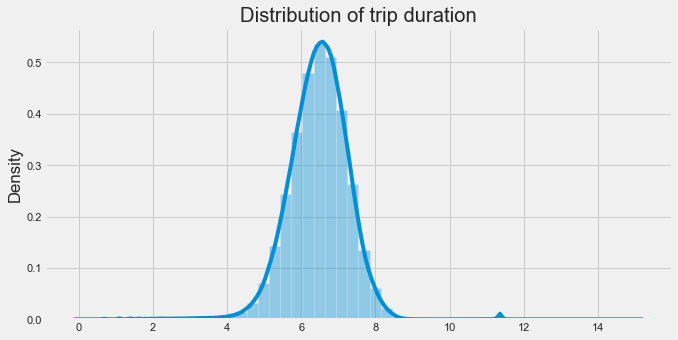

In [202]:
plt.figure(figsize = (10,5))
sns.distplot(np.log(train['trip_duration'].values))
plt.title('Distribution of trip duration')

### Plot for most common places of pickup and dropoff loacations

#### 1.) Scatter plot for pickup location

(-74.03, -73.75)

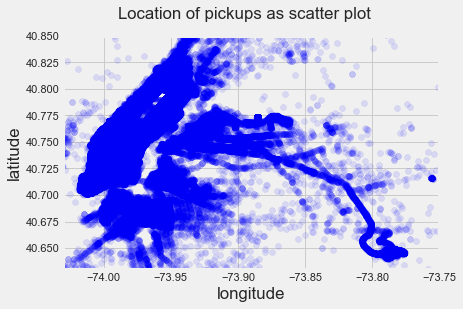

In [223]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

fig, ax = plt.subplots(ncols = 1, sharex = True, sharey = True)
ax.scatter(train['pickup_longitude'], train['pickup_latitude'],
           color = 'blue', label = 'train', alpha = 0.1)

fig.suptitle('Location of pickups as scatter plot')

ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

#### 2.) Heat map for pickup locations

In [208]:
pickup = train.groupby(['pickup_latitude_round','pickup_longitude_round'])['id'].count().reset_index().rename(columns={'id':'Num_Trips'})

In [209]:
pickup['Num_Trips'] = pickup['Num_Trips'].astype('float64')

In [211]:
pickup_map = folium.Map(location = [40.730610,-73.935242],zoom_start = 10,)

hm_wide = HeatMap(list(zip(pickup.pickup_latitude_round.values, 
                           pickup.pickup_longitude_round.values,
                           pickup.Num_Trips.values)),
                  min_opacity = 0.2,
                  radius = 5, blur = 15,
                  max_zoom = 1)

pickup_map.add_child(hm_wide)

pickup_map

#### 3.) Heat map for dropoff locations

In [254]:
dropoff=train.groupby(['dropoff_latitude_round','dropoff_longitude_round'])['id'].count().reset_index().rename(columns={'id':'Num_Trips'})

In [255]:
for col in dropoff.columns:
    if dropoff[col].dtype != 'float64':
        dropoff[col] = dropoff[col].astype('float64')

In [256]:
drop_map = folium.Map(location = [40.730610,-73.935242],zoom_start = 10,)

hm_wide = HeatMap( list(zip(dropoff.dropoff_latitude_round.values, dropoff.dropoff_longitude_round.values, drop.Num_Trips.values)),
                     min_opacity=0.2,
                     radius=5, blur=15,
                     max_zoom=1)

drop_map.add_child(hm_wide)
drop_map

#### 4.) Heat map for pickup locations(2)

In [220]:
pickup = train.groupby(['pickup_latitude_round', 'pickup_longitude_round'])['trip_duration'].mean().reset_index().rename(columns = {'trip_duration' : 'Avg_Trip_duration'})

In [221]:
pickup_map = folium.Map(location = [40.730610,-73.935242],zoom_start = 10)

hm_wide = HeatMap(list(zip(pickup.pickup_latitude_round.values,
                           pickup.pickup_longitude_round.values,
                           pickup.Avg_Trip_duration.values)),
                  min_opacity = 0.2,
                  radoius = 7, blur = 15,
                  max_zoom = 1)

pickup_map.add_child(hm_wide)
pickup_map

### Plot for pickup and dropoff hours

#### 1.) Pickup

Text(0.5, 1.0, 'Pickup hours distribution')

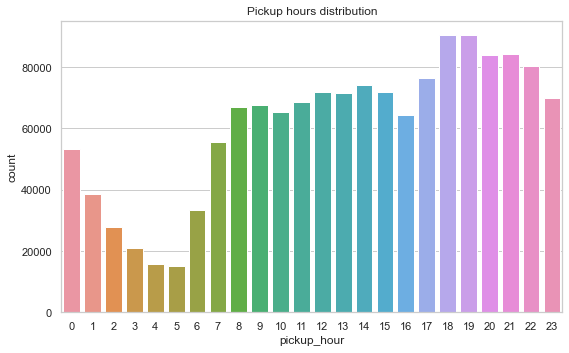

In [257]:
plt.figure(figsize = (8, 5))
sns.countplot(x = train['pickup_hour']).set_title('Pickup hours distribution')

#### 2.) Dropoff

Text(0.5, 1.0, 'Dropoff hours distribution')

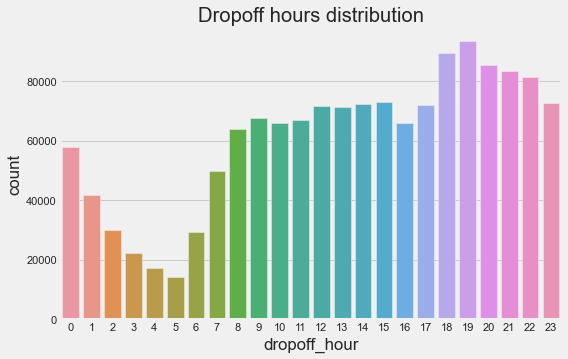

In [225]:
plt.figure(figsize = (8, 5))
sns.countplot(x = train['dropoff_hour']).set_title('Dropoff hours distribution')

Text(0.5, 1.0, 'Distribution of pickups over the entire time period')

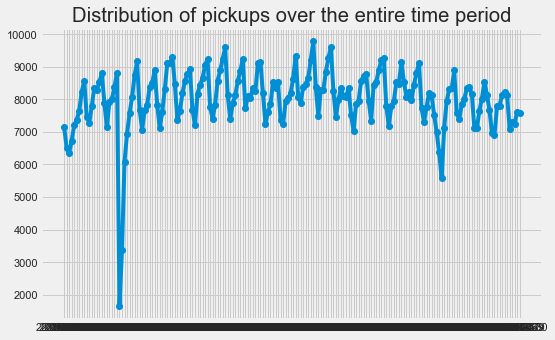

In [227]:
plt.figure(figsize = (8, 5))
plt.plot(train.groupby('pickup_date').count()[['id']], 'o-', label = 'train')

plt.title('Distribution of pickups over the entire time period')

In [228]:
train['trip_distance'].values

array([1.4989912 , 1.80607396, 6.38710292, ..., 7.82706209, 1.09290687,
       1.13439796])

#### Plot for trip distance and duration

Text(0, 0.5, 'trip duration')

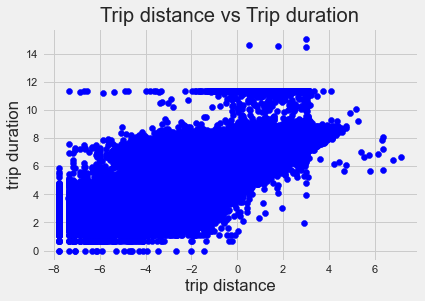

In [231]:
plt.scatter(np.log(train['trip_distance'].values), np.log(train['trip_duration'].values),
            color = 'blue', label = 'train')

plt.title('Trip distance vs Trip duration')
plt.xlabel('trip distance')
plt.ylabel('trip duration')

### Plot for pickup days of week and average trip duration

#### 1.) Count of pickups on eacg day of a week

<AxesSubplot:xlabel='pickup_day_of_week', ylabel='count'>

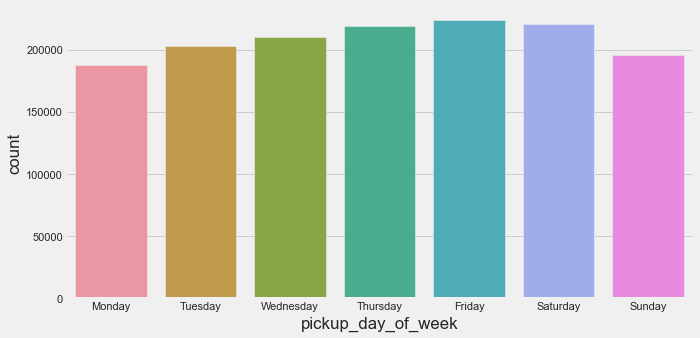

In [233]:
plt.figure(figsize = (10, 5))
sns.countplot(train['pickup_day_of_week'], order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'])

#### 2.) Average trip duration in every hour of a day

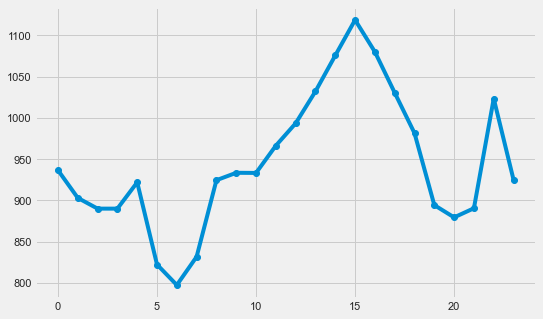

In [232]:
avg_duration_hour = train.groupby(['pickup_hour'])['trip_duration'].mean().reset_index().rename(columns = {'trip_duration':'avg_trip_duration'})
plt.figure(figsize = (8, 5))
plt.plot(avg_duration_hour['avg_trip_duration'], 'o-')

#### 3.) Average trip and pickups days of week

Text(0.5, 1.0, 'avg trip duration vs pickup days of week')

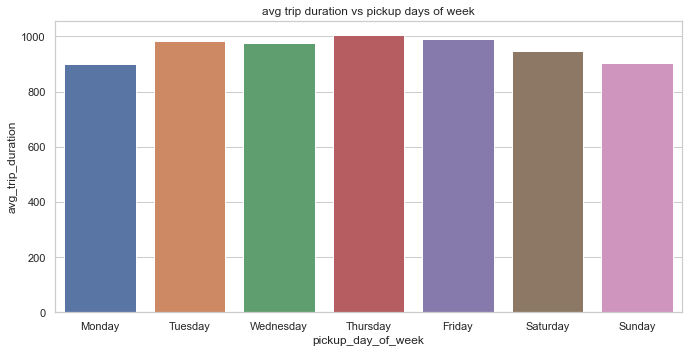

In [259]:
avg_duration_day = train.groupby(['pickup_day_of_week'])['trip_duration'].mean().reset_index().rename(columns = {'trip_duration' : 'avg_trip_duration'})

plt.figure(figsize = (10, 5))
sns.barplot(x = 'pickup_day_of_week', y = 'avg_trip_duration', data = avg_duration_day,
            order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'])
plt.title('avg trip duration vs pickup days of week')

In [237]:
def calculateBearing(lat1,lng1,lat2,lng2):
    R = 6371 
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [238]:
train['bearing']=train.apply(lambda row:calculateBearing(row['pickup_latitude_round'],row['pickup_longitude_round'],
                                                         row['dropoff_latitude_round'],row['dropoff_longitude_round']),axis=1)

In [240]:
train['pickup_latitude_round']

0          40.768
1          40.739
2          40.764
3          40.720
4          40.793
            ...  
1458639    40.746
1458640    40.747
1458641    40.769
1458642    40.749
1458643    40.782
Name: pickup_latitude_round, Length: 1458644, dtype: float64

<AxesSubplot:xlabel='bearing', ylabel='Density'>

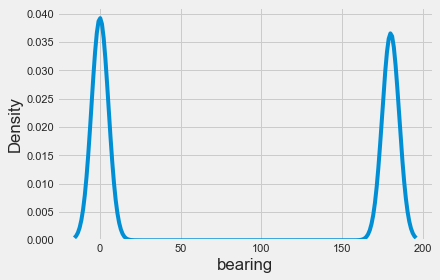

In [241]:
sns.kdeplot(train['bearing'])

In [242]:
train['store_and_fwd_flag'].value_counts()

N    1450599
Y    8045   
Name: store_and_fwd_flag, dtype: int64

Text(0, 0.5, 'Count')

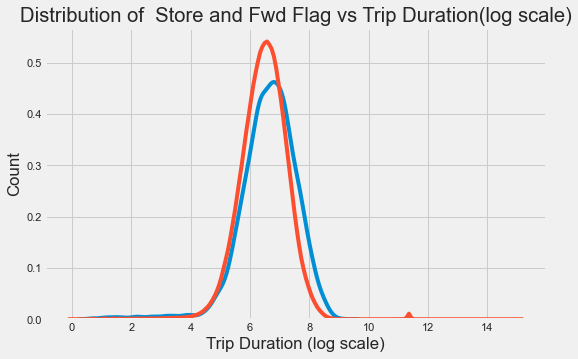

In [243]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(train.loc[train['store_and_fwd_flag']=='Y','trip_duration'].values),label= 'Store and Fwd =Yes')
sns.kdeplot(np.log(train.loc[train['store_and_fwd_flag']=='N','trip_duration'].values),label= 'Store and Fwd =No')
   
plt.title("Distribution of  Store and Fwd Flag vs Trip Duration(log scale)")
plt.xlabel('Trip Duration (log scale)')
plt.ylabel('Count')

### Average speed 
 And Outlier removal

In [244]:
train['avg_speed_kph']=train['trip_distance']/train['trip_duration_in_hour']

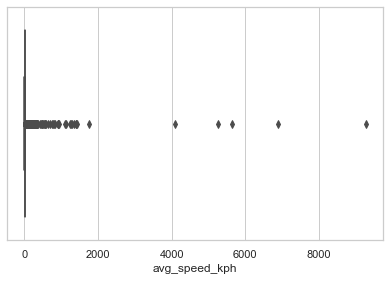

In [245]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=train["avg_speed_kph"])

In [246]:
for x in ['avg_speed_kph']:
    q75,q25 = np.percentile(train.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train.loc[train[x] < min,x] = np.nan
    train.loc[train[x] > max,x] = np.nan

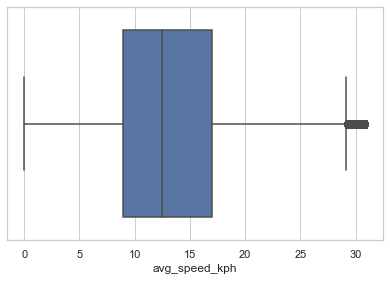

In [247]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=train["avg_speed_kph"])

### Plot for Average speed

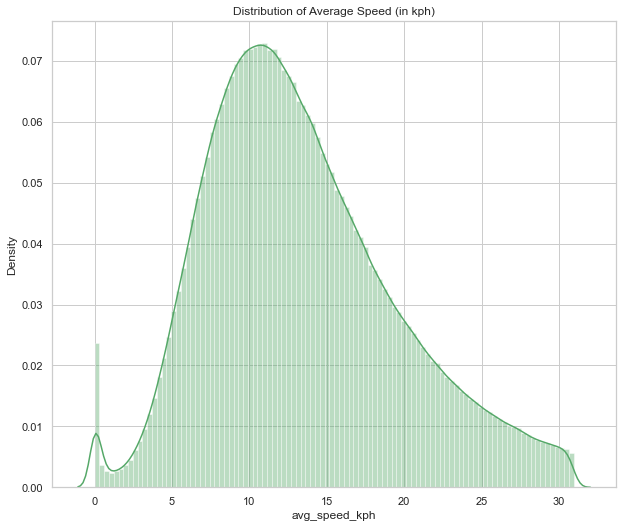

In [248]:
plt.figure(figsize=(9, 8))
plt.title("Distribution of Average Speed")
sns.distplot(train['avg_speed_kph'], color='g', bins=100, hist_kws={'alpha': 0.4});

Text(0.5, 1.0, 'Avg Speed vs Pickup Days of Week')

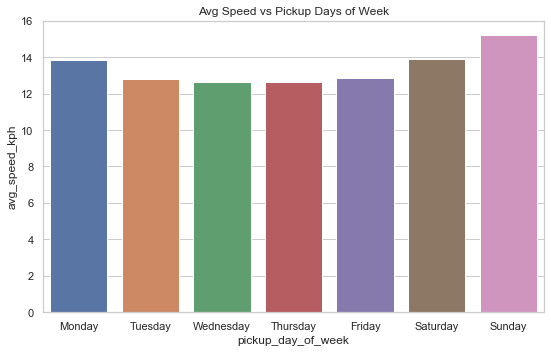

In [249]:
avg_speed_per_day=train.groupby(['pickup_day_of_week'])['avg_speed_kph'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='pickup_day_of_week',y='avg_speed_kph',data=avg_speed_per_day,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'])
plt.title("Avg Speed vs Pickup Days of Week")

### Kmeans

(-74.03, -73.75)

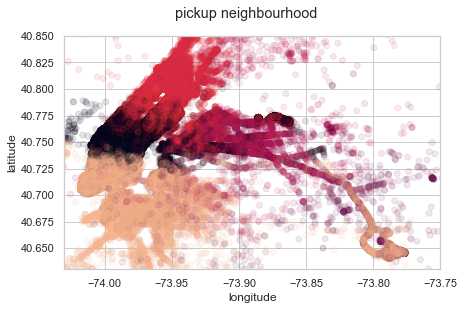

In [251]:
coord = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                   train[['dropoff_latitude', 'dropoff_longitude']].values))
kmeans = KMeans(n_clusters = 8, random_state = 0).fit(coords)
train.loc[:, 'pickup_neighbourhood'] = kmeans.predict(train[['pickup_latitude', 
                                                            'dropoff_longitude']])
train.loc[:, 'dropoff_neighbourhood'] = kmeans.predict(train[['dropoff_latitude',
                                                            'pickup_longitude']])
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols = 1, sharex = True, sharey = True)
ax.scatter(train['pickup_longitude'], train['pickup_latitude'],
           c = train['pickup_neighbourhood'], label = 'train', alpha = 0.1)
fig.suptitle('pickup neighbourhood')

ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

###  Plots for Pickup neighbourhood

Text(0.5, 1.0, 'Distribution of Number of Pickups across Neighbourhoods')

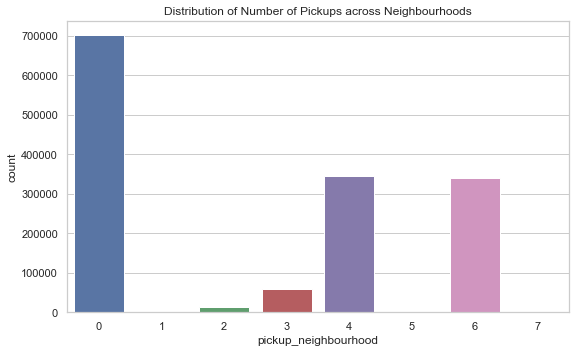

In [252]:
plt.figure(figsize=(8,5))
sns.countplot(train['pickup_neighbourhood']).set_title("Distribution of Number of Pickups across Neighbourhoods")

Text(0.5, 1.0, 'Avg trip duration vs Neighbourhood')

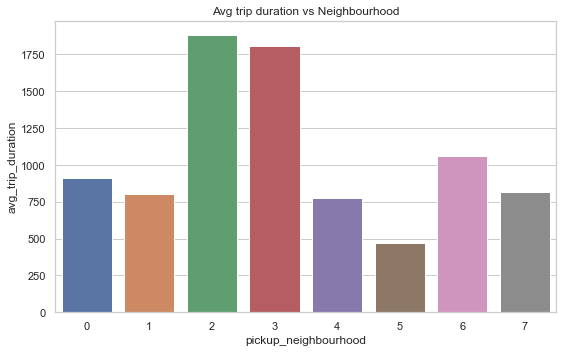

In [261]:
avg_duration_neighbourhood = train.groupby(['pickup_neighbourhood'])['trip_duration'].mean().reset_index().rename(columns = {'trip_duration':'avg_trip_duration'})
plt.figure(figsize = (8, 5))
sns.barplot(x = 'pickup_neighbourhood', y ='avg_trip_duration',
            data = avg_duration_neighbourhood).set_title('Avg trip duration vs Neighbourhood')

# CONCLUSION
With the help of the above data, we can conclude 
1. March month is busy month as compared to whole year.
2. Busiest location is the nearby area of the air-port 
3. 6pm – 8pm has most pickup and drop-off in whole day and busiest days are Thursday and Friday.
4. Average speed of the taxis remains between 12-13 kmph on busy day/weeldays and upto15 on weekends 
5. Most of the pickup has been done from near by area of airport 